<a href="https://colab.research.google.com/github/Ankit2058/Image-classification/blob/main/2nd_one_to_look_for.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plot
import torch.nn as nn

In [2]:
#now lets make a function and train the model to repllicate the function
X= torch.rand(100).unsqueeze(dim=1)
weight = 0.5
bias = 0.2
Y= weight*X*X + bias

#now lets split these data into train and test split
#first let me import the scikit libraray to split the data into train and test split
import sklearn
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,shuffle=True)
print(len(train_X))
print(len(test_X))
print(X.shape)


80
20
torch.Size([100, 1])


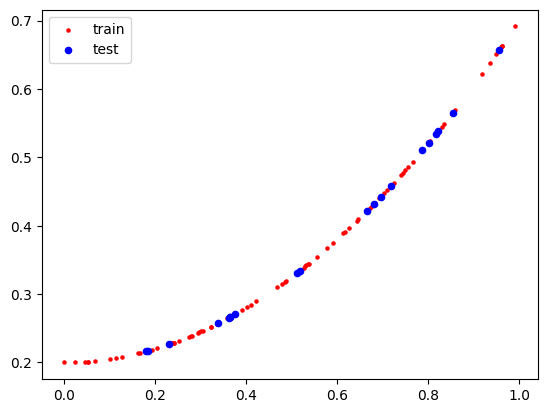

In [3]:
#lets define a function to visualize the data using the sactter plot
import matplotlib.pyplot as plt
def plotting(train_X,train_Y,test_X,test_Y,prediction):
  plt.scatter(train_X,train_Y,s=5,c='r',label='train')
  plt.scatter(test_X,test_Y,s=20,c='b',label='test')
  if prediction != None:
    plt.scatter(test_X,prediction,s=8,c='g',label='predict')
  plt.legend()
  plt.show()
#with this fucntion defined lets display the plot
plotting(train_X,train_Y,test_X,test_Y,None)

In [4]:
#now lets define a model: a model means the function that when trained with enough data is able to generalize the data
#and find the relation in between input and output of the training data
class Neuranet(nn.Module):
  #first job is to define a constructor which will automaticatlly define the neurons of the object when instanciated
  def __init__(self):
    #first we call the constructor of the parent class
    super().__init__()
    #now we define our model which is just two parameter weight and biases
    self.weight1= nn.Parameter(torch.rand(1,requires_grad=True))
    self.weight2= nn.Parameter(torch.rand(1,requires_grad=True))
    self.bias1= nn.Parameter(torch.rand(1,requires_grad=True))
    self.bias2= nn.Parameter(torch.rand(1,requires_grad=True))
    self.relu = nn.ReLU()
    self.linear = nn.Linear(1,1)
  #now lets define a function to do forward propagation
  def forward(self,x):
    x=self.weight1*x+ self.bias1
    x=self.relu(x)
    x=self.weight2*x+ self.bias2
    x=self.relu(x)
    return x

  #and now we have a model defined and also a fucntion to give us output by forward propagation lets instancite the model

model=Neuranet();
print(list(model.parameters()))

[Parameter containing:
tensor([0.6090], requires_grad=True), Parameter containing:
tensor([0.2800], requires_grad=True), Parameter containing:
tensor([0.4970], requires_grad=True), Parameter containing:
tensor([0.2804], requires_grad=True), Parameter containing:
tensor([[-0.2284]], requires_grad=True), Parameter containing:
tensor([0.6114], requires_grad=True)]


###now lets train our model
###first we need to predict with the current model
###for training we need a loss fucntion to define the losss of the prediction
####then we calculate the gradient which we back propagate
###then we change the values of the parameters on the basis of calculate gradient usinig the opimyzer

#lets do the losss

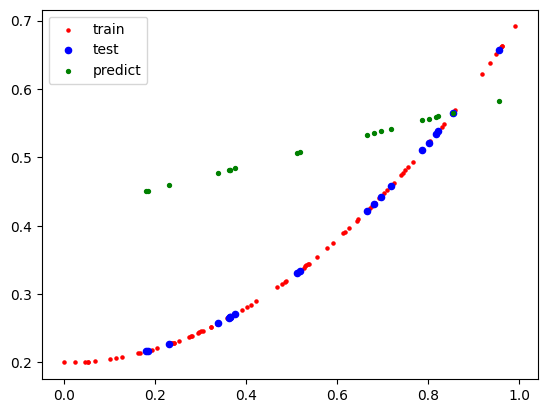

the loss with current model is 0.13617123663425446


In [5]:
#this is our defination of loss
lossfunc = nn.L1Loss()

#now lets do some prediction and find the loss

with torch.inference_mode():
  prediction=model(test_X)
#first let us print our prediction
plotting(train_X,train_Y,test_X,test_Y,prediction)
#now lets calculate the value of loss
loss = lossfunc(prediction,test_Y)
print(f"the loss with current model is {loss.item()}")






In [6]:
#now lets define our optimyzer
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [7]:
epoch=1000
for i in range(epoch):
  optimizer.zero_grad()
  prediction=model(train_X)
  loss=lossfunc(prediction,train_Y)
  loss.backward()
  optimizer.step()
  if (i%100==0):
    print(f"loss is {loss.item()}")

loss is 0.15652164816856384
loss is 0.07544773817062378
loss is 0.05690355971455574
loss is 0.04041830450296402
loss is 0.032144978642463684
loss is 0.028504500165581703
loss is 0.02789946459233761
loss is 0.027709737420082092
loss is 0.027699673548340797
loss is 0.02768998220562935


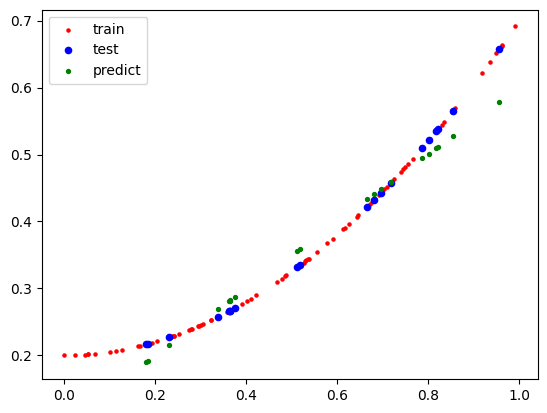

In [10]:
with torch.inference_mode():
  prediction=model(test_X)
  #now let us print our prediction after some trainning
plotting(train_X,train_Y,test_X,test_Y,prediction)



In [11]:
#that's it we have generated the x and y value the created a model to generalize upon the training data

In [12]:
print("i am connected to the kernel")
if torch.cpu.is_available():
  print("the above box are also executed and ready to ship the functionality to the entire code")

i am connected to the kernel
the above box are also executed and ready to ship the functionality to the entire code


In [13]:
model.state_dict()

OrderedDict([('weight1', tensor([0.8630])),
             ('weight2', tensor([0.5824])),
             ('bias1', tensor([0.3585])),
             ('bias2', tensor([-0.1104])),
             ('linear.weight', tensor([[-0.2284]])),
             ('linear.bias', tensor([0.6114]))])

In [14]:
model.eval()

Neuranet(
  (relu): ReLU()
  (linear): Linear(in_features=1, out_features=1, bias=True)
)